In [1]:
import keras
import seaborn as sns

sns.set_style("white")

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [2]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


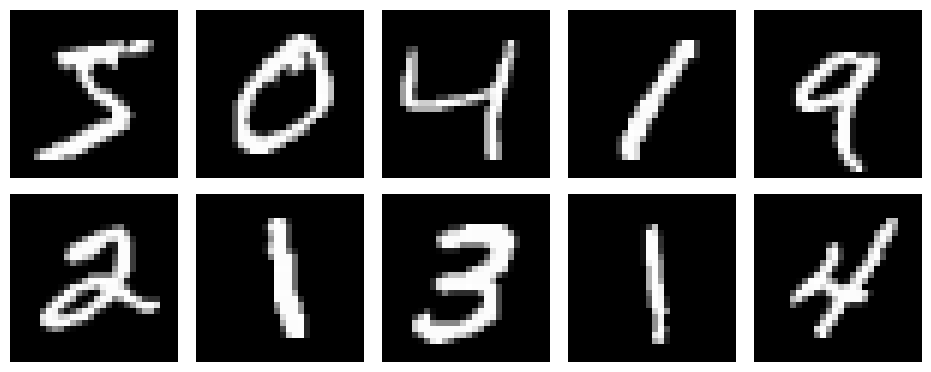

In [3]:
import matplotlib.pyplot as plt

def display_images(data, nrows= 2, ncols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap="gray")
        ax.axis("off")
    
    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0 )

display_images(X_train)

In [ ]:
from keras import layers

def make_model(nodes= None, names = None, activations = []):
    model = keras.Sequential(name="MLP")
    model.add(layers.Flatten(input_shape=(28, 28), name="Input"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name=name, activation=activation))
    
    model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [ ]:
model_naive = make_model(nodes=[10], names=["Output"], activations=["softmax"])
model_naive.summary()

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [10]:
import pandas as pd

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.index = range(len(naive_history))

naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86686,0.508718,0.9122,0.309785
1,0.91122,0.317319,0.9216,0.279643
2,0.91784,0.292970,0.9272,0.266265
3,0.92034,0.281279,0.9285,0.261300
4,0.92296,0.273570,0.9287,0.258764


<Axes: >

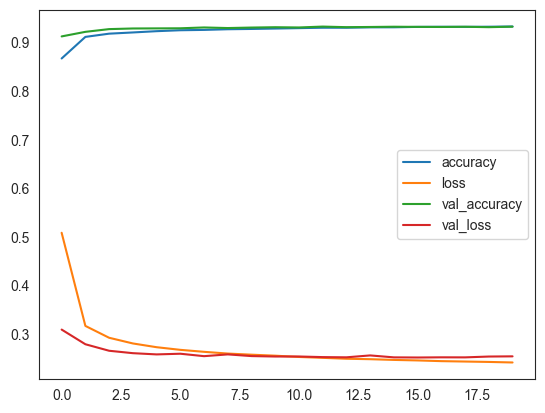

In [22]:
naive_history.plot()

In [12]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1,2, figsize=(12,4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs", ylabel=metric[0], title=metric[0], ax=ax, style=style)

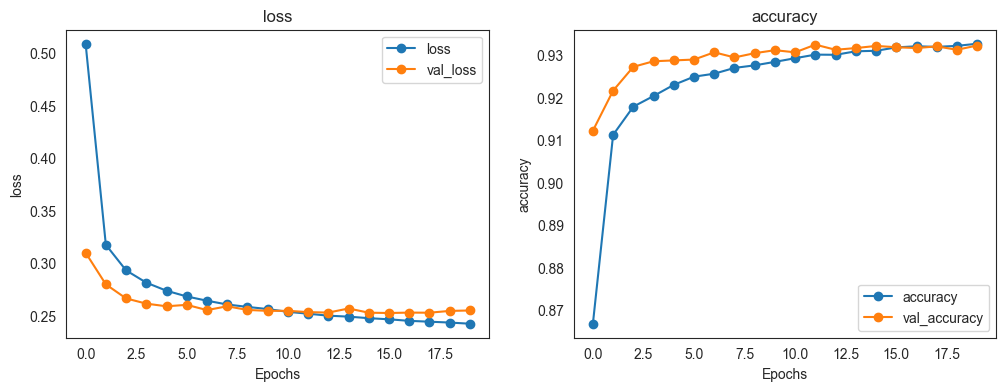

In [13]:
plot_metrics(naive_history)

In [ ]:
model_deep = make_model([128, 128, 10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden2", "Output"])

model_deep.summary()

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_deep.fit(X_train, y_train, validation_split=1/6, verbose=0, epochs=20)

deep_history = pd.DataFrame(model_deep.history.history)
deep_history.index = range(len(deep_history))

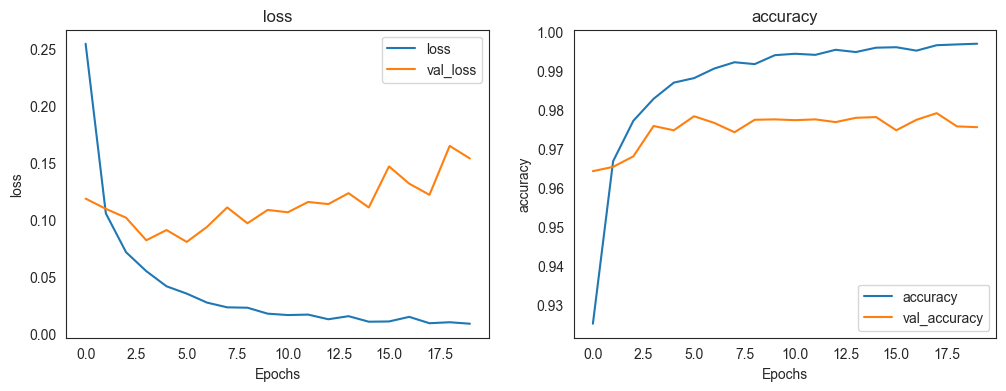

In [16]:
plot_metrics(deep_history, style="-")

In [19]:
model_deep.fit(X_train, y_train, epochs=8, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



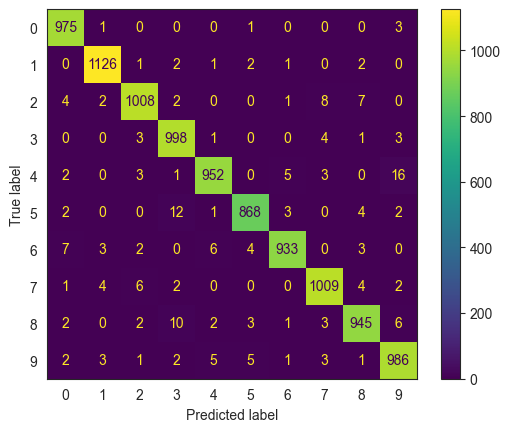

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model_deep.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

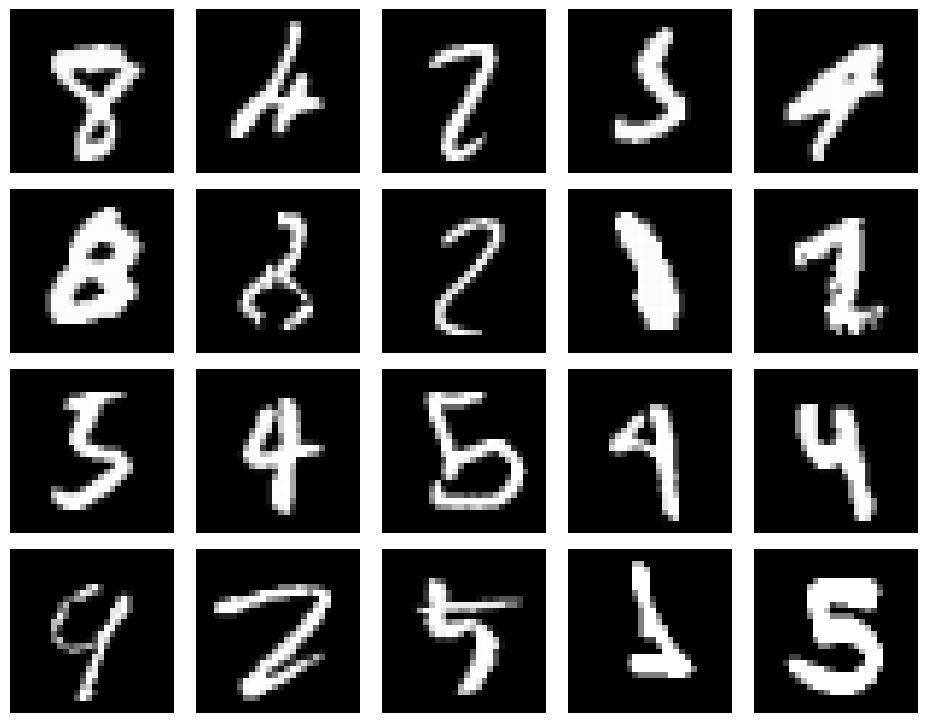

In [21]:
missclassified_indices = np.where(y_pred != y_test)[0]
missclassified_samples = X_test[missclassified_indices]

display_images(missclassified_samples, 4, 5, (12,8))